<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A9%9F%E7%8E%87%E7%B5%B1%E8%A8%88/%E6%AD%A3%E6%85%8B%E5%88%86%E4%BD%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install wget

In [2]:
import wget
#下載字型ChineseFont.ttf
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

## 繪製符合 均值 0、標準差 1 的 正態分佈 (Normal Distribution) 圖表

### 步驟
1.	產生符合標準正態分佈（均值 0，標準差 1）的隨機數據。
2.	使用 matplotlib.pyplot 繪製 直方圖 (Histogram) 來展示數據分佈。
3.	使用 scipy.stats.norm.pdf() 計算理論上的正態分佈曲線，並疊加在圖上。

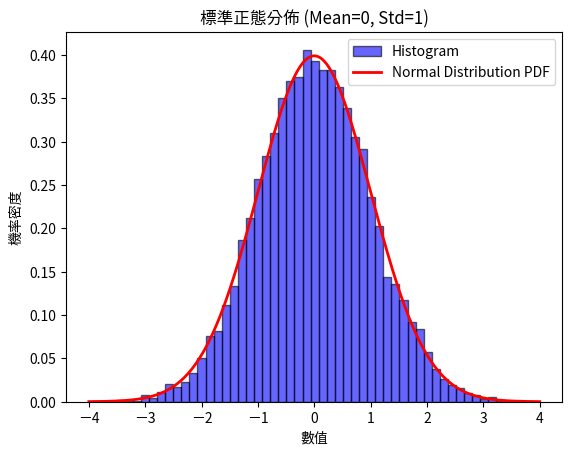

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
from scipy.stats import norm

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 產生 10000 個符合標準正態分佈 (均值 0，標準差 1) 的數據
data = np.random.normal(loc=0, scale=1, size=10000)

# 繪製直方圖
# 說明1
plt.hist(data, bins=50, density=True, alpha=0.6, color='b', edgecolor='black', label="Histogram")

# 生成正態分佈的理論曲線
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc=0, scale=1)  # 計算機率密度函數 (PDF)

# 疊加理論的正態分佈曲線
plt.plot(x, pdf, 'r', linewidth=2, label="Normal Distribution PDF")

# 標註圖表
plt.title("標準正態分佈 (Mean=0, Std=1)")
plt.xlabel("數值")
plt.ylabel("機率密度")
plt.legend()

# 顯示圖表
plt.show()

### 結果

1. 藍色直方圖：表示 10,000 個隨機生成的數據點在不同範圍的分佈情況。
2. 紅色曲線：標準正態分佈的理論機率密度函數（PDF），用來與直方圖對照。


# 說明1

## `plt.hist()` 函數說明

這行程式碼用於繪製直方圖，各參數的意義如下：

1. `data`: 要繪製的數據來源（在這個例子中是 10,000 個符合標準正態分佈的隨機數據）

2. `bins=50`: 
   - 將數據分成 50 個區間
   - 每個區間會形成一個長方形柱子
   - bin 數量越多，圖形越細緻，但可能會增加雜訊

參考:說明2
3. `density=True`: 
   - 將直方圖標準化為機率密度
   - 使直方圖下的總面積為 1
   - 這樣可以直接與機率密度函數 (PDF) 進行比較

4. `alpha=0.6`:
   - 設定透明度為 0.6（範圍是 0 到 1）
   - 讓圖形有半透明效果
   - 當需要疊加其他圖形時很有用

5. `color='b'`:
   - 設定直方圖填充顏色為藍色
   - 'b' 是藍色的簡寫

6. `edgecolor='black'`:
   - 設定直方圖每個柱子的邊框顏色為黑色
   - 增加視覺對比度

7. `label="Histogram"`:
   - 設定圖例標籤為 "Histogram"
   - 在使用 `plt.legend()` 時會顯示這個標籤

這段程式碼的主要目的是將隨機生成的正態分佈數據視覺化，並準備與理論正態分佈曲線進行比較。

# 說明2

## 機率密度標準化的意義

當我們設定 `density=True` 時，直方圖會進行以下處理：

### 1. 標準化前的直方圖
- 一般的直方圖顯示的是「次數」或「頻率」
- 每個長條的高度代表該區間內數據出現的次數
- 這樣的直方圖總面積會隨著數據量不同而改變

### 2. 標準化後的直方圖 
- 將每個長條的高度調整，使得整個直方圖下的面積等於 1
- 此時長條的高度不再代表次數，而是代表機率密度
- 計算方式：
  ```
  長條高度 = 原始高度 ÷ (總數據量 × 每個區間的寬度)
  ```

### 3. 為什麼要這樣做？
- 機率密度函數(PDF)的一個重要特性就是其下方總面積為 1
- 標準化後的直方圖可以直接和理論的常態分配曲線比較
- 不同大小的數據集也可以直接比較其分布形狀

### 舉例
如果我們有兩組數據：
- A組：1000筆數據
- B組：10000筆數據

使用 `density=True` 後：
- 兩組的直方圖可以直接比較
- 都能和理論PDF曲線直接對照
- 面積都會是1，代表100%的機率

這樣的標準化讓我們能更好地觀察和比較數據的分布特性。

# 說明3

## 1. `x = np.linspace(-4, 4, 1000)`

這行程式碼使用 NumPy 的 `linspace` 函數來生成 x 軸的值：

- `-4`: 起始值
- `4`: 結束值 
- `1000`: 在這個範圍內產生 1000 個均勻分布的點
- 結果會產生一個從 -4 到 4 的等距數列，共 1000 個點
- 這些點將用來繪製正態分布曲線的 x 座標

## 2. `pdf = norm.pdf(x, loc=0, scale=1)`

這行使用 SciPy 的統計模組計算正態分布的機率密度函數(PDF)值：

- `norm.pdf()`: 計算正態分布的機率密度函數
- `x`: 上面生成的 x 座標點
- `loc=0`: 設定分布的平均值(μ)為 0
- `scale=1`: 設定標準差(σ)為 1
- 計算結果存在 `pdf` 變數中，代表每個 x 點對應的 y 值（機率密度）

### 這兩行的組合效果：
- 產生了標準常態分配曲線的所有座標點
- 之後可以用 `plt.plot(x, pdf)` 繪製出理論上的正態分布曲線
- 曲線會呈現典型的鐘形，在 0 處最高，向兩側對稱遞減

這兩行程式碼主要用於產生理論上的正態分布曲線，以便與實際數據的直方圖進行比較。